In [1]:
# General Dependencies
import timeit, os
import numpy as np
import scipy.io as io

# Preprocessing Dependencies
from trefide.utils import psd_noise_estimate

# PMD Model Dependencies
from trefide.pmd import batch_decompose, batch_recompose, overlapping_batch_decompose, overlapping_batch_recompose

# Plot & Video Dependencies
import mpdf_plot
import matplotlib.pyplot as plt
import mpdf_plot

# Plots
from trefide.plot import pixelwise_ranks
from trefide.extras.util_plot import comparison_plot
from trefide.video import write_mpl, play_cv2

%load_ext autoreload
%autoreload 2

In [12]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import animation
def write_video(movs, title, filename, clip=[0,1], mov_width=24, horizontal=True, background=False):
    
    d1, d2, num_frames = movs[0].shape
    
    # Find Figsize As To Almost Fit The Screen
    if horizontal:
        aspect_ratio = d1/(3*d2)
    else:
        aspect_ratio = 3*d1/d2
    mov_height = int(np.ceil(aspect_ratio * mov_width))+1 # account for cbar
    
    for mdx in range(3):
        movs[mdx] = (movs[mdx]).transpose([2,0,1])
        movs[mdx] = movs[mdx] - movs[mdx].min(axis=0, keepdims=True)
    minval = np.min([np.min(movs[mdx]) for mdx in range(3)])
    maxval = np.max([np.max(movs[mdx]) for mdx in range(3)])
    scale = maxval - minval
    for mdx in range(3):
        movs[mdx] = (movs[mdx] - minval) / scale
        movs[mdx] = np.clip(movs[mdx], clip[0], clip[1])
    
    if background:
        titles = [title + " Raw", title + " Denoised", title + " Foreground"]
    else:
        titles = [title + " Raw", title + " Denoised", title + " Residual"]
    
    if horizontal:
        fig, axs = plt.subplots(1 ,3, figsize=(mov_width,mov_height))
    else:
        fig, axs = plt.subplots(3 ,1, figsize=(mov_width,mov_height))
    for mdx in range(3):
        axs[mdx].set(title=title)
        axs[mdx].title.set_fontsize(15)
        axs[mdx].title.set_fontweight("bold")
        axs[mdx].set_xticks([])
        axs[mdx].set_yticks([])
    plt.tight_layout()

    imgs = [ax.imshow(movs[mdx][0,:,:],
                      vmin=clip[0],
                      vmax=clip[1],
                      cmap="Greys_r") for mdx, ax in enumerate(axs)]
    if horizontal:
        for mdx in range(3):
            divider = make_axes_locatable(axs[mdx])
            cax = divider.append_axes("bottom", size="5%", pad=0.1)
            plt.colorbar(imgs[mdx], cax=cax,orientation='horizontal',spacing='uniform')
    else:
        for mdx in range(3):
            divider = make_axes_locatable(axs[mdx])
            cax = divider.append_axes("right", size="5%", pad=0.1)
            plt.colorbar(imgs[mdx], cax=cax, orientation='vertical',spacing='uniform')
        
    def update(i):
        for mdx in range(3):
            imgs[mdx].set_data(movs[mdx][i+1,:,:]);
            axs[mdx].set(title=titles[mdx] + " Frame: {}".format(i))
        return imgs

    ani = animation.FuncAnimation(fig, update, frames=num_frames-1, blit=True);
    ani.save(filename, fps=60)

In [3]:
ext = "../trefide"
method = "PMD"

# 3P

In [5]:
dataset = "3P"
filename = os.path.join(ext, "data", dataset + "_" + method + ".npz")
mov = np.load(filename)['arr_0'].astype(np.float64).copy()
mov_denoised = np.load(filename)['arr_1'].astype(np.float64).copy()

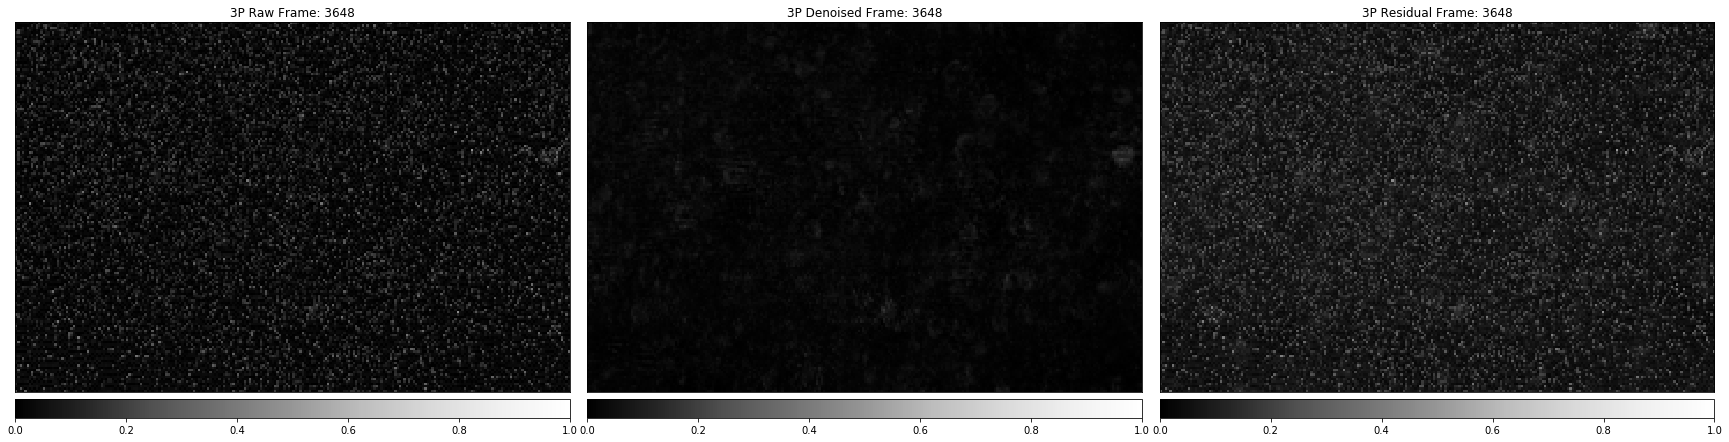

In [52]:
write_video([mov, mov_denoised, (mov - mov_denoised)],
            dataset,
            dataset + "_" + method + ".mp4")
plt.show()

# QState

In [59]:
dataset = "QState"
filename = os.path.join(ext, "data", dataset + "_" + method + ".npz")
mov = np.load(filename)['arr_0'].astype(np.float64).copy()
mov_denoised = np.load(filename)['arr_1'].astype(np.float64).copy()

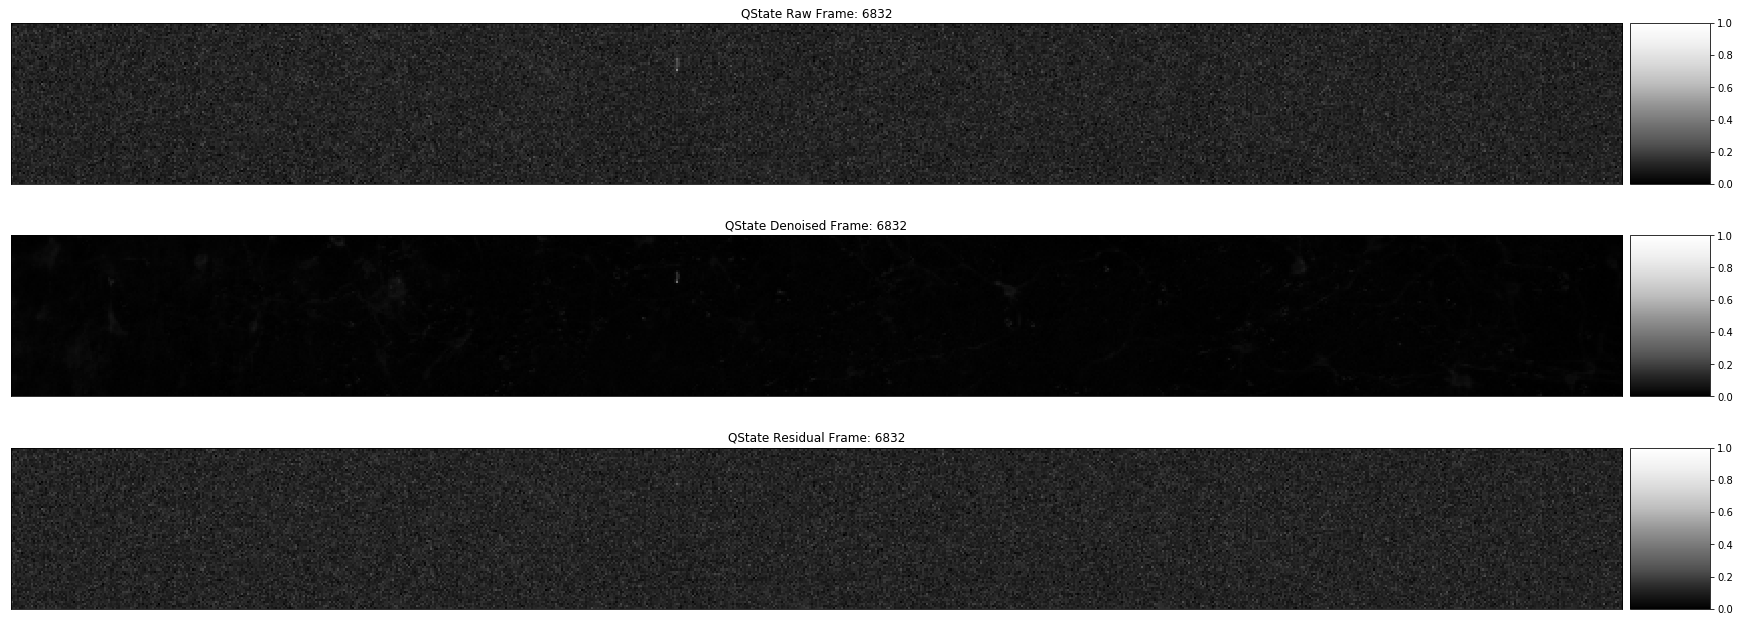

In [65]:
write_video([mov, mov_denoised, (mov - mov_denoised)],
            dataset,
            dataset + "_" + method + ".mp4", horizontal=False)
plt.show()

# Widefield

In [53]:
dataset = "Widefield"
filename = os.path.join(ext, "data", dataset + "_" + method + ".npz")
mov = np.load(filename)['arr_0'].astype(np.float64).copy()
mov_denoised = np.load(filename)['arr_1'].astype(np.float64).copy()

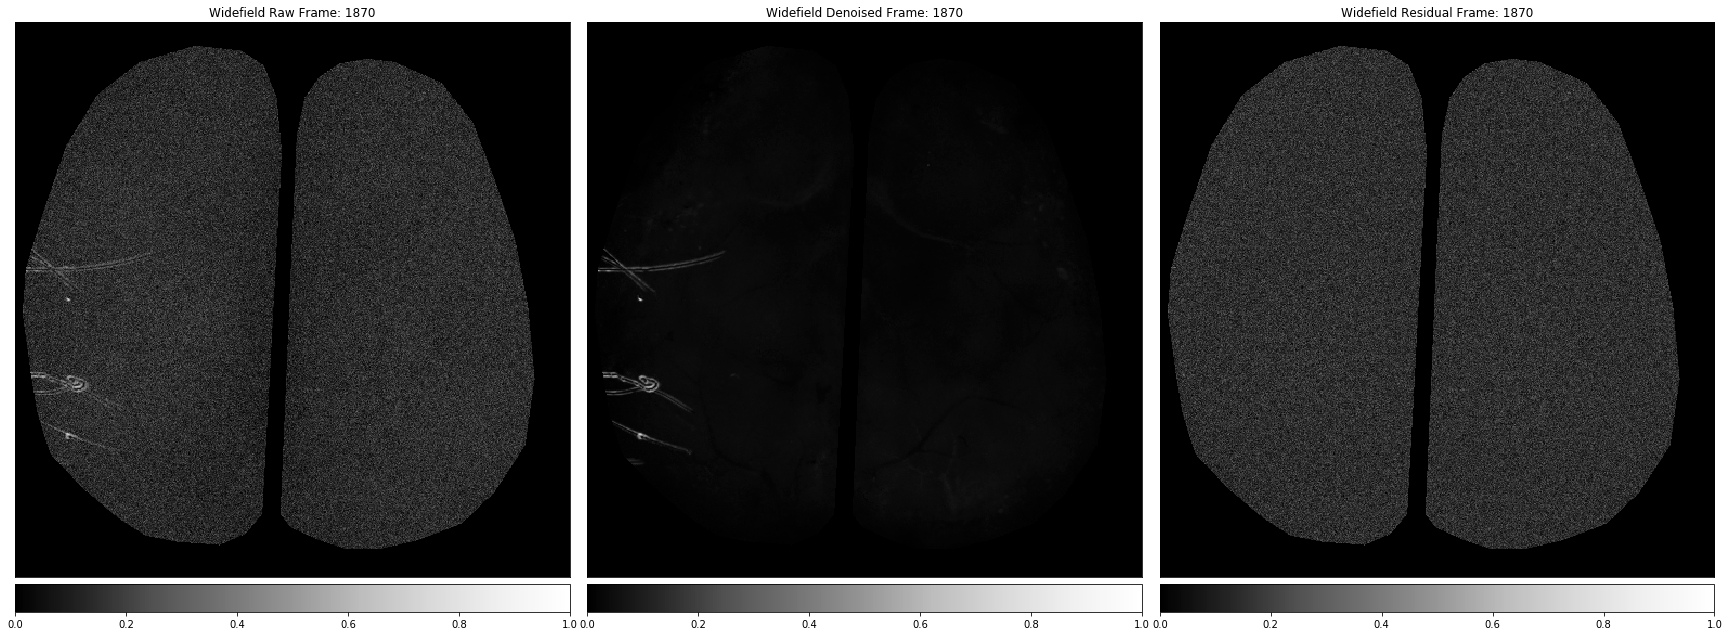

In [54]:
write_video([mov, mov_denoised, (mov - mov_denoised)],
            dataset,
            dataset + "_" + method + ".mp4")
plt.show()

# Endoscope

In [7]:
dataset = "Endoscope"
filename = os.path.join(ext, "data", dataset + "_" + method + ".npz")
mov = np.load(filename)['arr_0'].astype(np.float64).copy()
mov_denoised = np.load(filename)['arr_1'].astype(np.float64).copy()

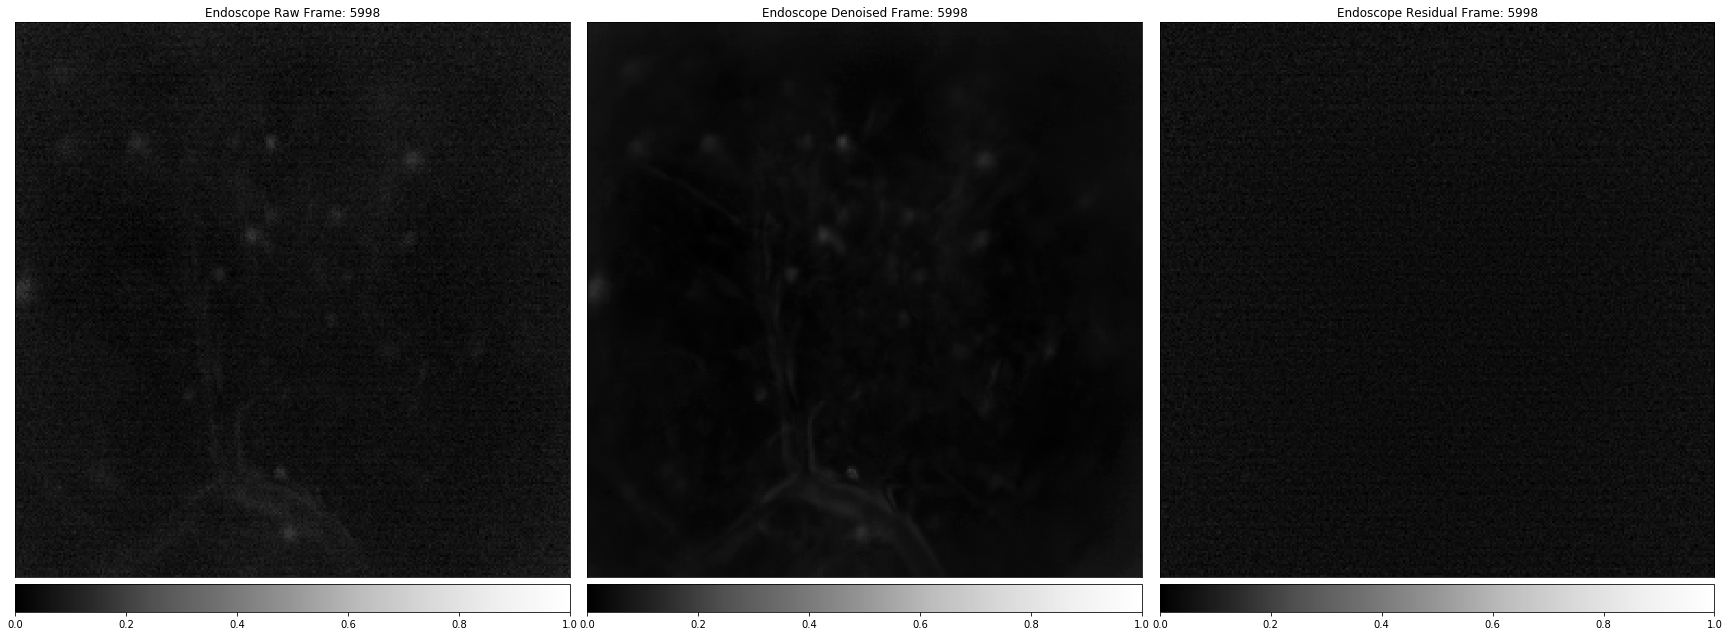

In [56]:
write_video([mov, mov_denoised, (mov - mov_denoised)],
            dataset,
            dataset + "_" + method + ".mp4")
plt.show()

In [8]:
# Set Data Information
data = np.load("endoscope_prepared.npz")
mov = data['arr_0']
background = data['arr_1']

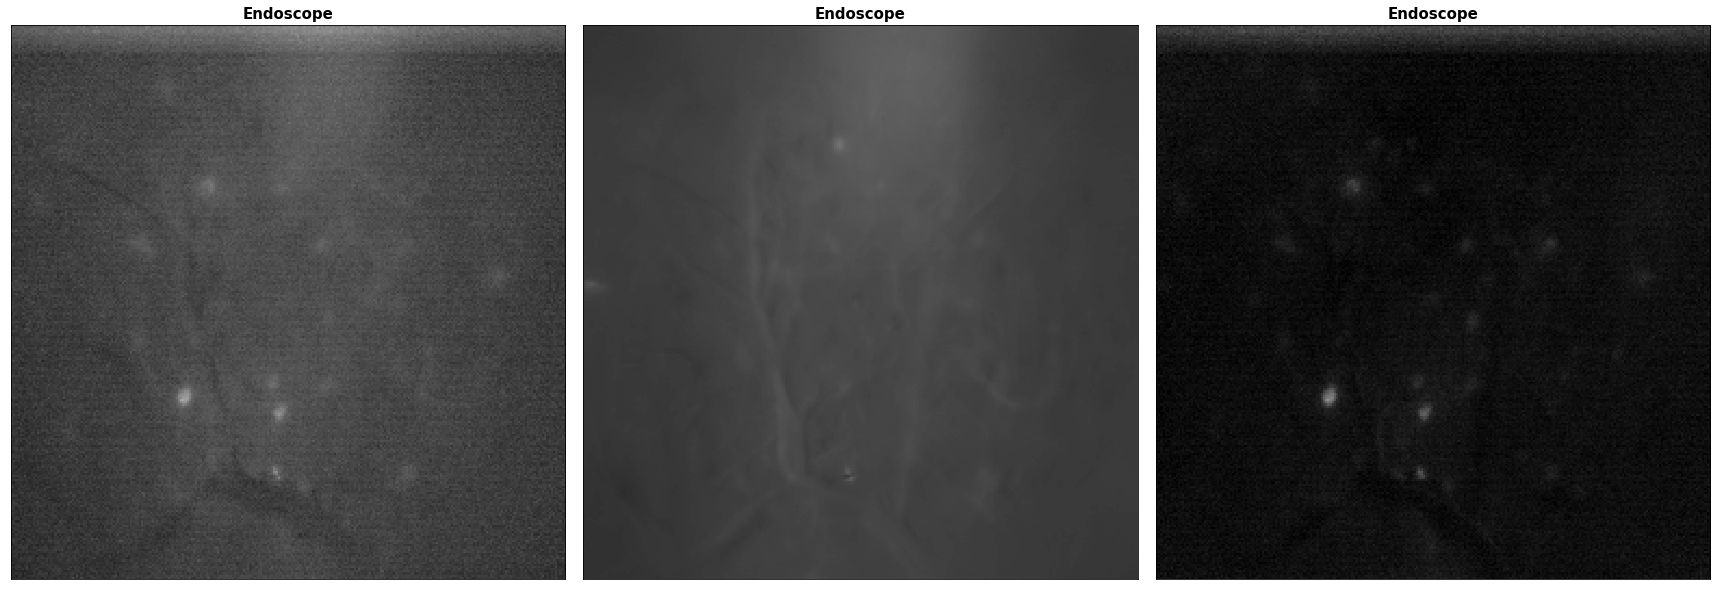

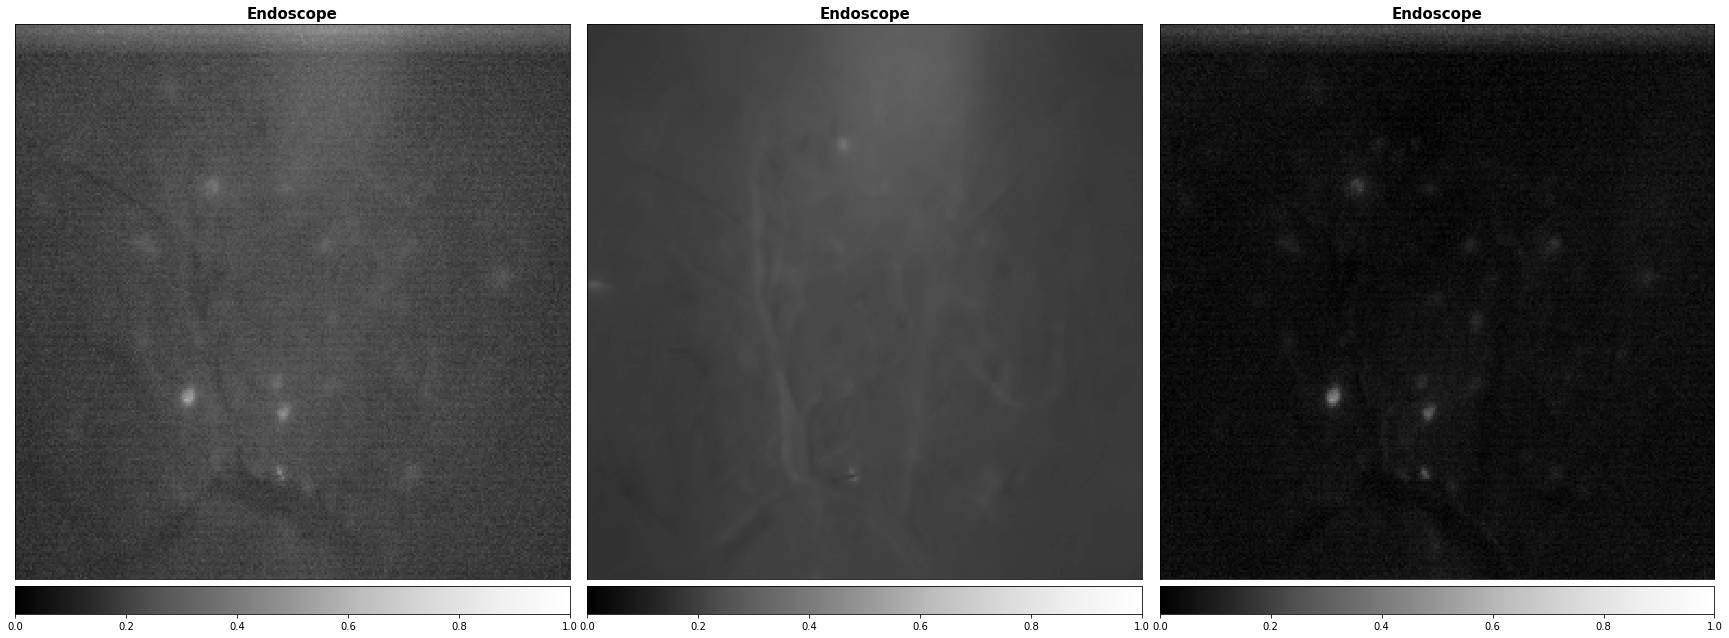

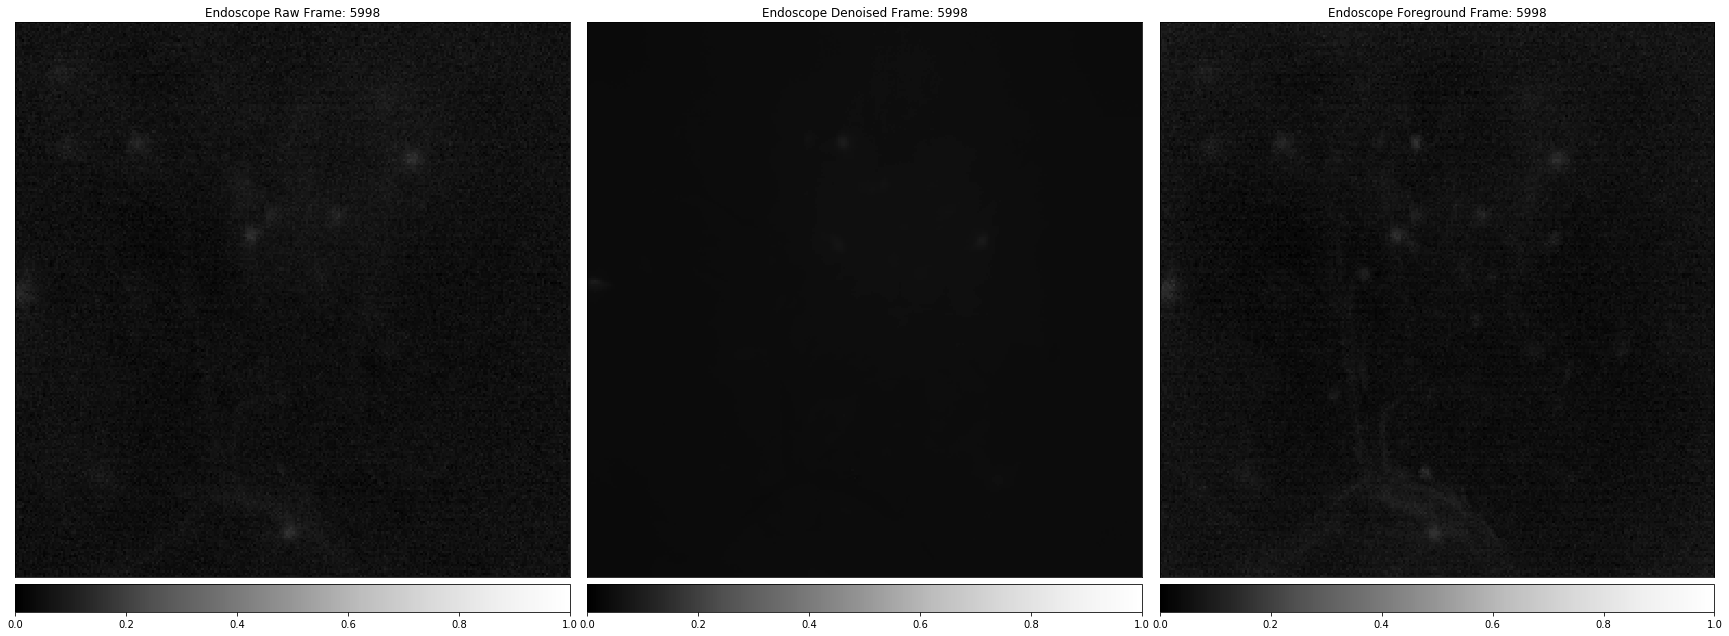

In [14]:
write_video([mov, background, mov-background],
            dataset,
            dataset + "_background_" + method + ".mp4",
           background=True)
plt.show()

# Dendritic

In [57]:
dataset = "Dendritic"
filename = os.path.join(ext, "data", dataset + "_" + method + ".npz")
mov = np.load(filename)['arr_0'].astype(np.float64).copy()
mov_denoised = np.load(filename)['arr_1'].astype(np.float64).copy()

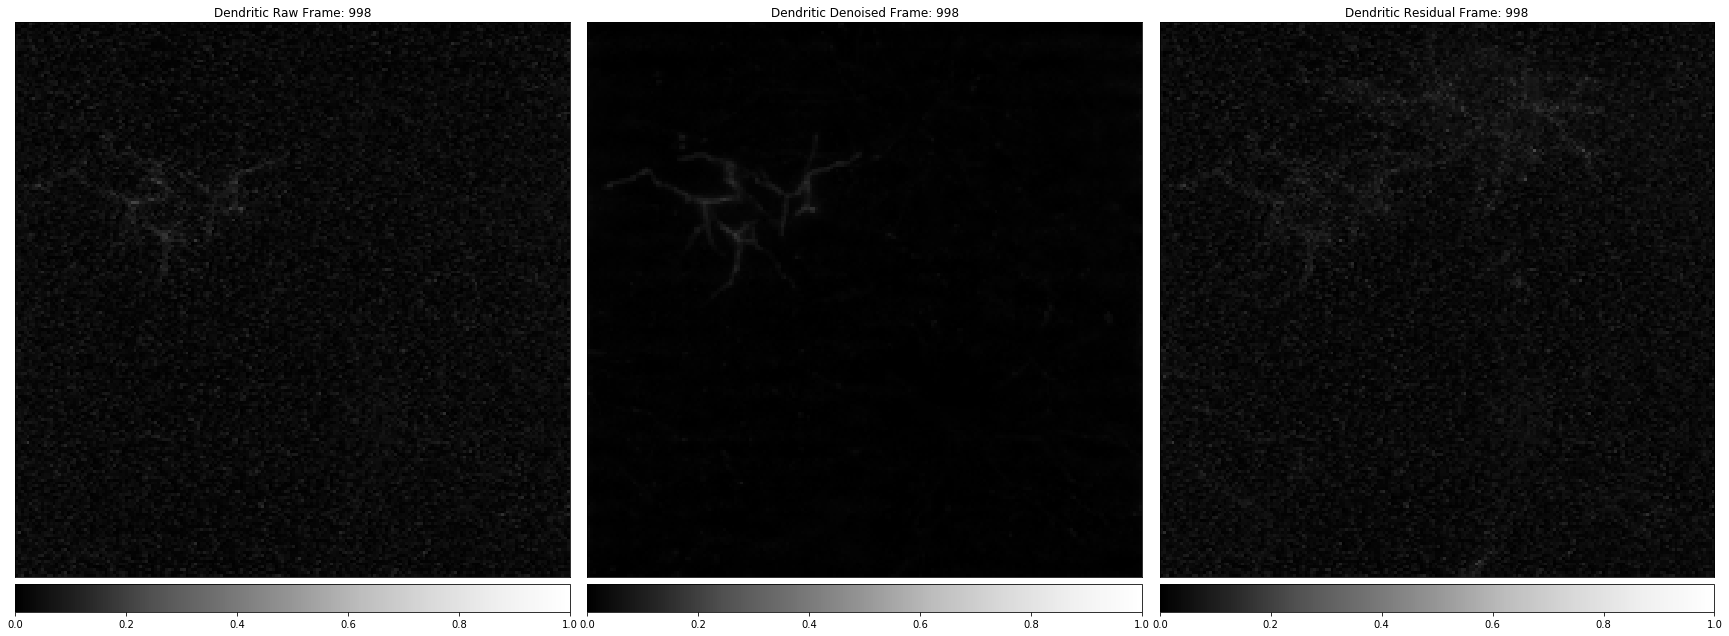

In [58]:
write_video([mov, mov_denoised, (mov - mov_denoised)],
            dataset,
            dataset + "_" + method + ".mp4")
plt.show()